In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


# Importing Required Libraries & Dependencies

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np

import pandas as pd

from collections import Counter
from scipy.stats import kurtosis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading Dataset

In [6]:
life_expectancy = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')

In [7]:
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [8]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Data Pre-Processing

In [9]:
# To remove extra trailing spaces (beginning and end) from column names
life_expectancy.columns = life_expectancy.columns.str.strip()

In [10]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
life_expectancy.columns = life_expectancy.columns.str.lower()

In [12]:
life_expectancy.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [13]:
life_expectancy.dtypes

country                             object
year                                 int64
status                              object
life expectancy                    float64
adult mortality                    float64
infant deaths                        int64
alcohol                            float64
percentage expenditure             float64
hepatitis b                        float64
measles                              int64
bmi                                float64
under-five deaths                    int64
polio                              float64
total expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
income composition of resources    float64
schooling                          float64
dtype: object

In [14]:
life_expectancy['year'] = life_expectancy['year'].astype(str) 

In [15]:
life_expectancy.dtypes

country                             object
year                                object
status                              object
life expectancy                    float64
adult mortality                    float64
infant deaths                        int64
alcohol                            float64
percentage expenditure             float64
hepatitis b                        float64
measles                              int64
bmi                                float64
under-five deaths                    int64
polio                              float64
total expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
income composition of resources    float64
schooling                          float64
dtype: object

In [16]:
life_expectancy = life_expectancy.dropna()

In [17]:
life_expectancy.shape

(1649, 22)

In [18]:
numerical_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

life_expectancy_numeric = life_expectancy.select_dtypes(include=numerical_types)

In [19]:
life_expectancy_numeric.columns

Index(['life expectancy', 'adult mortality', 'infant deaths', 'alcohol',
       'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'under-five deaths', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [20]:
life_expectancy_numeric.shape

(1649, 19)

# Central Tendancy Measures

--- 


Central tendency measures are statistical metrics that summarize a set of data by identifying the central point or typical value around which the data tend to cluster.

## Mean

---

- The sum of all data points divided by the total number of data points.

In [21]:
mean_results = [] 

for column_name, column_values in life_expectancy_numeric.items():
    values = life_expectancy_numeric[column_name]
    column_mean = values.sum() / values.count()
    mean_results.append({"Column": column_name, "Mean": column_mean})

mean_df = pd.DataFrame(mean_results)
mean_df

,Column,Mean
0,life expectancy,69.302
1,adult mortality,168.215
2,infant deaths,32.553
3,alcohol,4.533
4,percentage expenditure,698.974
5,hepatitis b,79.218
6,measles,2224.494
7,bmi,38.129
8,under-five deaths,44.220
9,polio,83.565


## Median

---

- The middle value in an ordered dataset.
    - If the number of data points is odd, the median is the middle value.
    - If even, it is the average of the two middle values.

In [22]:
def calculate_median(column):
    
    sorted_values = column.dropna().sort_values().values #Sorting values
    
    n = len(sorted_values) # Finding total no.of values
    
    middlie_term = n // 2 # Getting middle term
    
    if n % 2: # If even
        median = (sorted_values[middlie_term - 1] + sorted_values[middlie_term]) / 2
    else: # If not even
        median = sorted_values[middlie_term]
        
    return  median

In [23]:
median_results = []

for column_name, column_values in life_expectancy_numeric.items():
    median = calculate_median(column_values)
    median_results.append({"Column": column_name, "Median": median})

median_df = pd.DataFrame(median_results)

median_df

,Column,Median
0,life expectancy,71.700
1,adult mortality,148.000
2,infant deaths,3.000
3,alcohol,3.785
4,percentage expenditure,145.044
5,hepatitis b,89.000
6,measles,14.500
7,bmi,43.650
8,under-five deaths,4.000
9,polio,93.000


## Mode

---

- The most frequently occurring value(s) in the dataset.
- A dataset can have :
    - no mode
    - one mode (unimodal)
    - more than one mode (bimodal or multimodal)

In [24]:
def calculate_mode(column):
    
    values = column.dropna()  # Remove NaN values
    
    frequency = Counter(values)  # Counting frequencies of each value in a particular column
    max_count = max(frequency.values())  # Finding the highest frequency
    
    # Finding all values with the highest frequency
    modes = [str(key) for key, count in frequency.items() if count == max_count]
    
    return ", ".join(modes)  # Returning a comma-separated string

In [25]:
mode_results = []

for column_name, column_values in life_expectancy_numeric.items():
    mode = calculate_mode(column_values)
    mode_results.append({"Column": column_name, "Mode": mode})

mode_df = pd.DataFrame(mode_results)
mode_df

,Column,Mode
0,life expectancy,73.0
1,adult mortality,"14.0, 12.0"
2,infant deaths,0
3,alcohol,0.01
4,percentage expenditure,0.0
5,hepatitis b,98.0
6,measles,0
7,bmi,"57.2, 55.7, 58.5, 57.0"
8,under-five deaths,0
9,polio,99.0


# Skewness

Skewness is a statistical measure that describes the asymmetry or lack of symmetry in the distribution of a dataset. It provides insights into the shape and nature of the distribution relative to a normal distribution, which is perfectly symmetric.


* *Skewness = 0: Symmetric distribution*
* *Skewness > 0: Right-skewed*
* *Skewness < 0: Left-skewed*

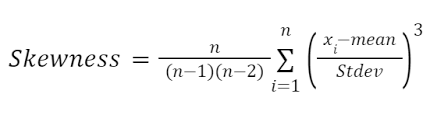

<img src = 'https://ledidi.com/uploads/icons/median-mode-mean-central-dendency-ledidi-academy.png'>




# Types of Skewness

--- 

### **Positive Skew (Right-Skewed)** 

The tail on the right side of the distribution is longer or fatter than the left side. Most data values are concentrated on the lower side, and the mean is usually greater than the median.

Example: 

- Income distribution in many countries (most people earn below-average income, with a few high earners).

  
    - Skewness > 0.

---

### **Negative Skew (Left-Skewed)**


The tail on the left side of the distribution is longer or fatter than the right side. Most data values are concentrated on the higher side, and the mean is usually less than the median.

Example: 

- Age at retirement (most people retire around the same age, with a few retiring earlier than the average).
    - Skewness < 0.
 
---

### **Zero Skew (Symmetrical)** 

The distribution is perfectly symmetrical, meaning the mean, median, and mode are all equal.

Example: 

- Heights of individuals in a population are often symmetric.
    - Skewness = 0 (approximately).


---

In [26]:
def calculate_skewness(values):
    mean = np.mean(values)
    median = np.median(values)
    std_dev = np.std(values, ddof=1)  # Use ddof=1 for sample standard deviation
    skewness = 3 * (mean - median) / std_dev  # Pearson's second skewness coefficient
    return skewness

In [27]:
skewness_results = []

# Loop through each column to calculate skewness
for column_name, column_values in life_expectancy_numeric.items():
    skewness = calculate_skewness(column_values)
    skewness_results.append({"Column": column_name, "Skewness": skewness})

In [28]:
skewness_df = pd.DataFrame(skewness_results)

# Define skewness classification function
def classify_skewness(skewness):
    if skewness < 0:
        return "Left"
    elif skewness > 0:
        return "Right"
    else:
        return "Symmetric"

# Add skewness classification
skewness_df["Skewness Type"] = skewness_df["Skewness"].apply(classify_skewness)

# Display the DataFrame
skewness_df

,Column,Skewness,Skewness Type
0,life expectancy,-0.818,Left
1,adult mortality,0.484,Right
2,infant deaths,0.734,Right
3,alcohol,0.553,Right
4,percentage expenditure,0.945,Right
5,hepatitis b,-1.146,Left
6,measles,0.657,Right
7,bmi,-0.846,Left
8,under-five deaths,0.741,Right
9,polio,-1.261,Left


**Right Skewed**

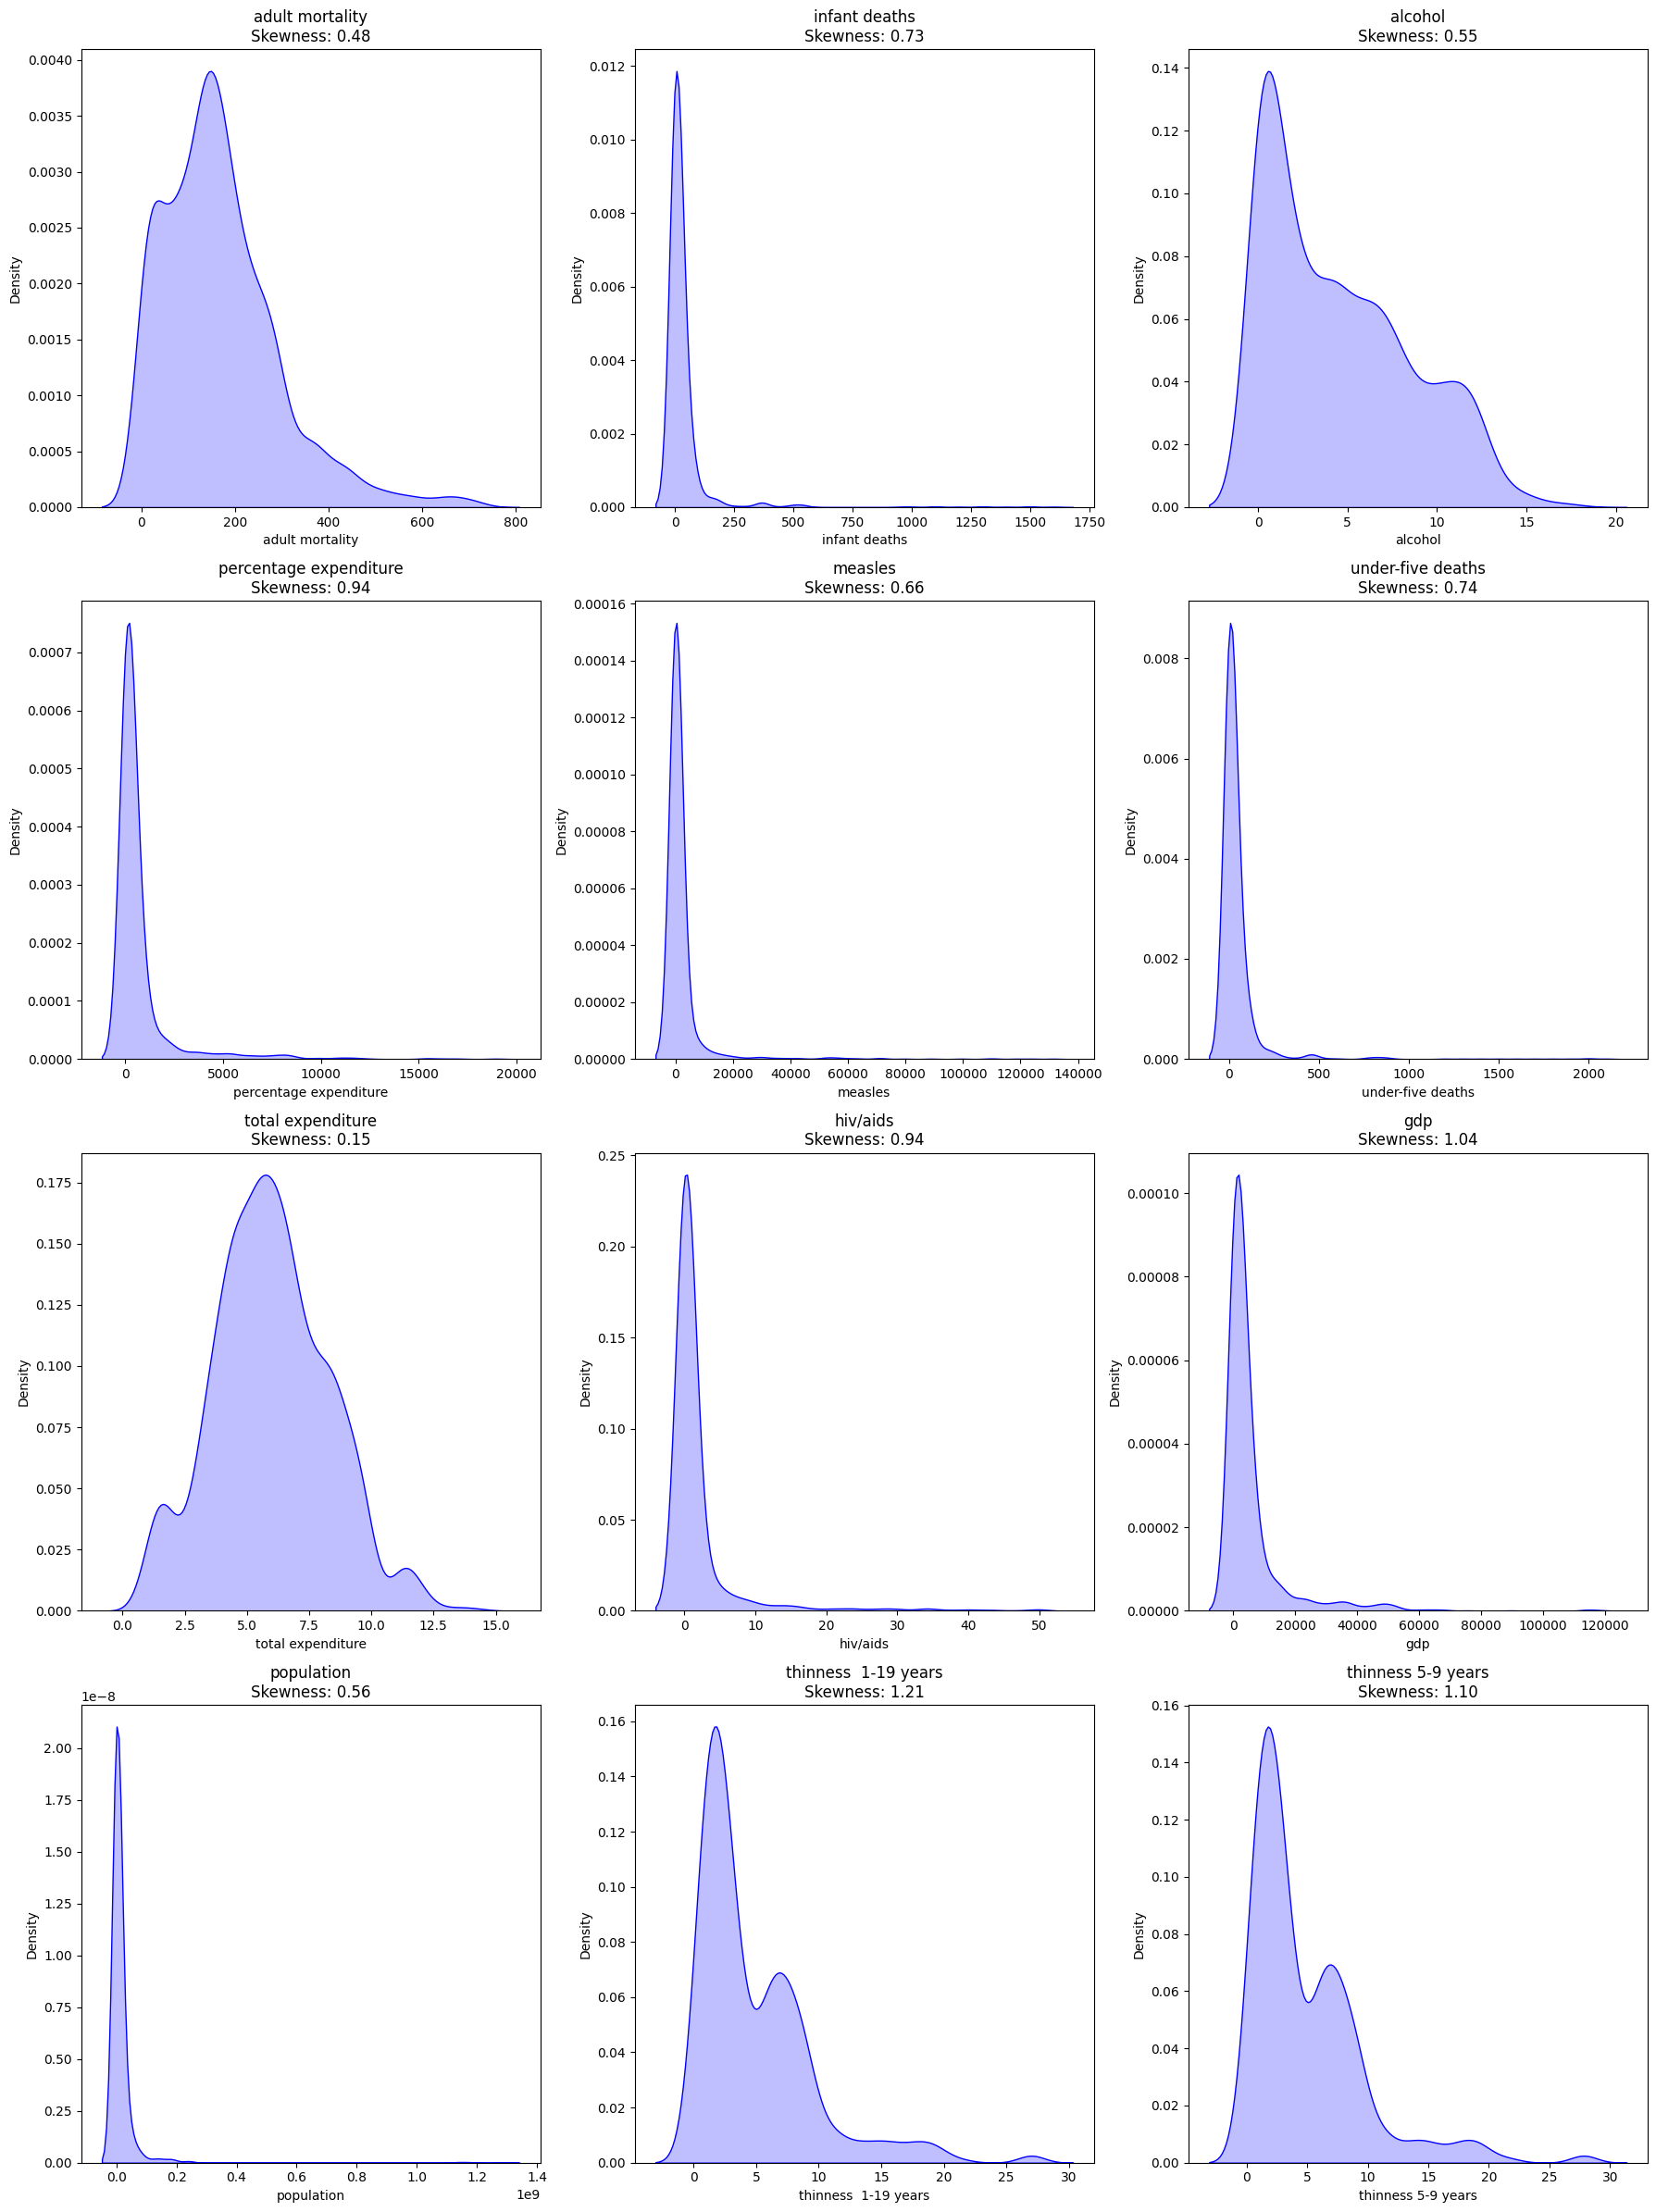

In [29]:
# Filtering columns with positive skewness (right-skewed)
right_skewed = skewness_df[skewness_df["Skewness"] > 0]

# Getting right-skewed column names
right_skewed_columns = right_skewed["Column"].tolist()

# Preparing data for plotting
right_skewed_data = life_expectancy_numeric[right_skewed_columns]

# Create subplots for right-skewed columns
num_skewed = len(right_skewed_columns)
fig, axes = plt.subplots(
    nrows=(num_skewed // 3 + (num_skewed % 3 > 0)),  # Number of rows
    ncols=3,  # Fixed number of columns per row
    figsize=(18, num_skewed * 2),
)
axes = axes.flatten()

for idx, column_name in enumerate(right_skewed_columns):
    values = right_skewed_data[column_name].dropna()  
    sns.kdeplot(values, shade=True, color="blue", ax=axes[idx])
    axes[idx].set_title(f"{column_name}\nSkewness: {right_skewed.loc[right_skewed['Column'] == column_name, 'Skewness'].values[0]:.2f}", fontsize=12)

plt.tight_layout()
plt.show()

**Left Skewed**

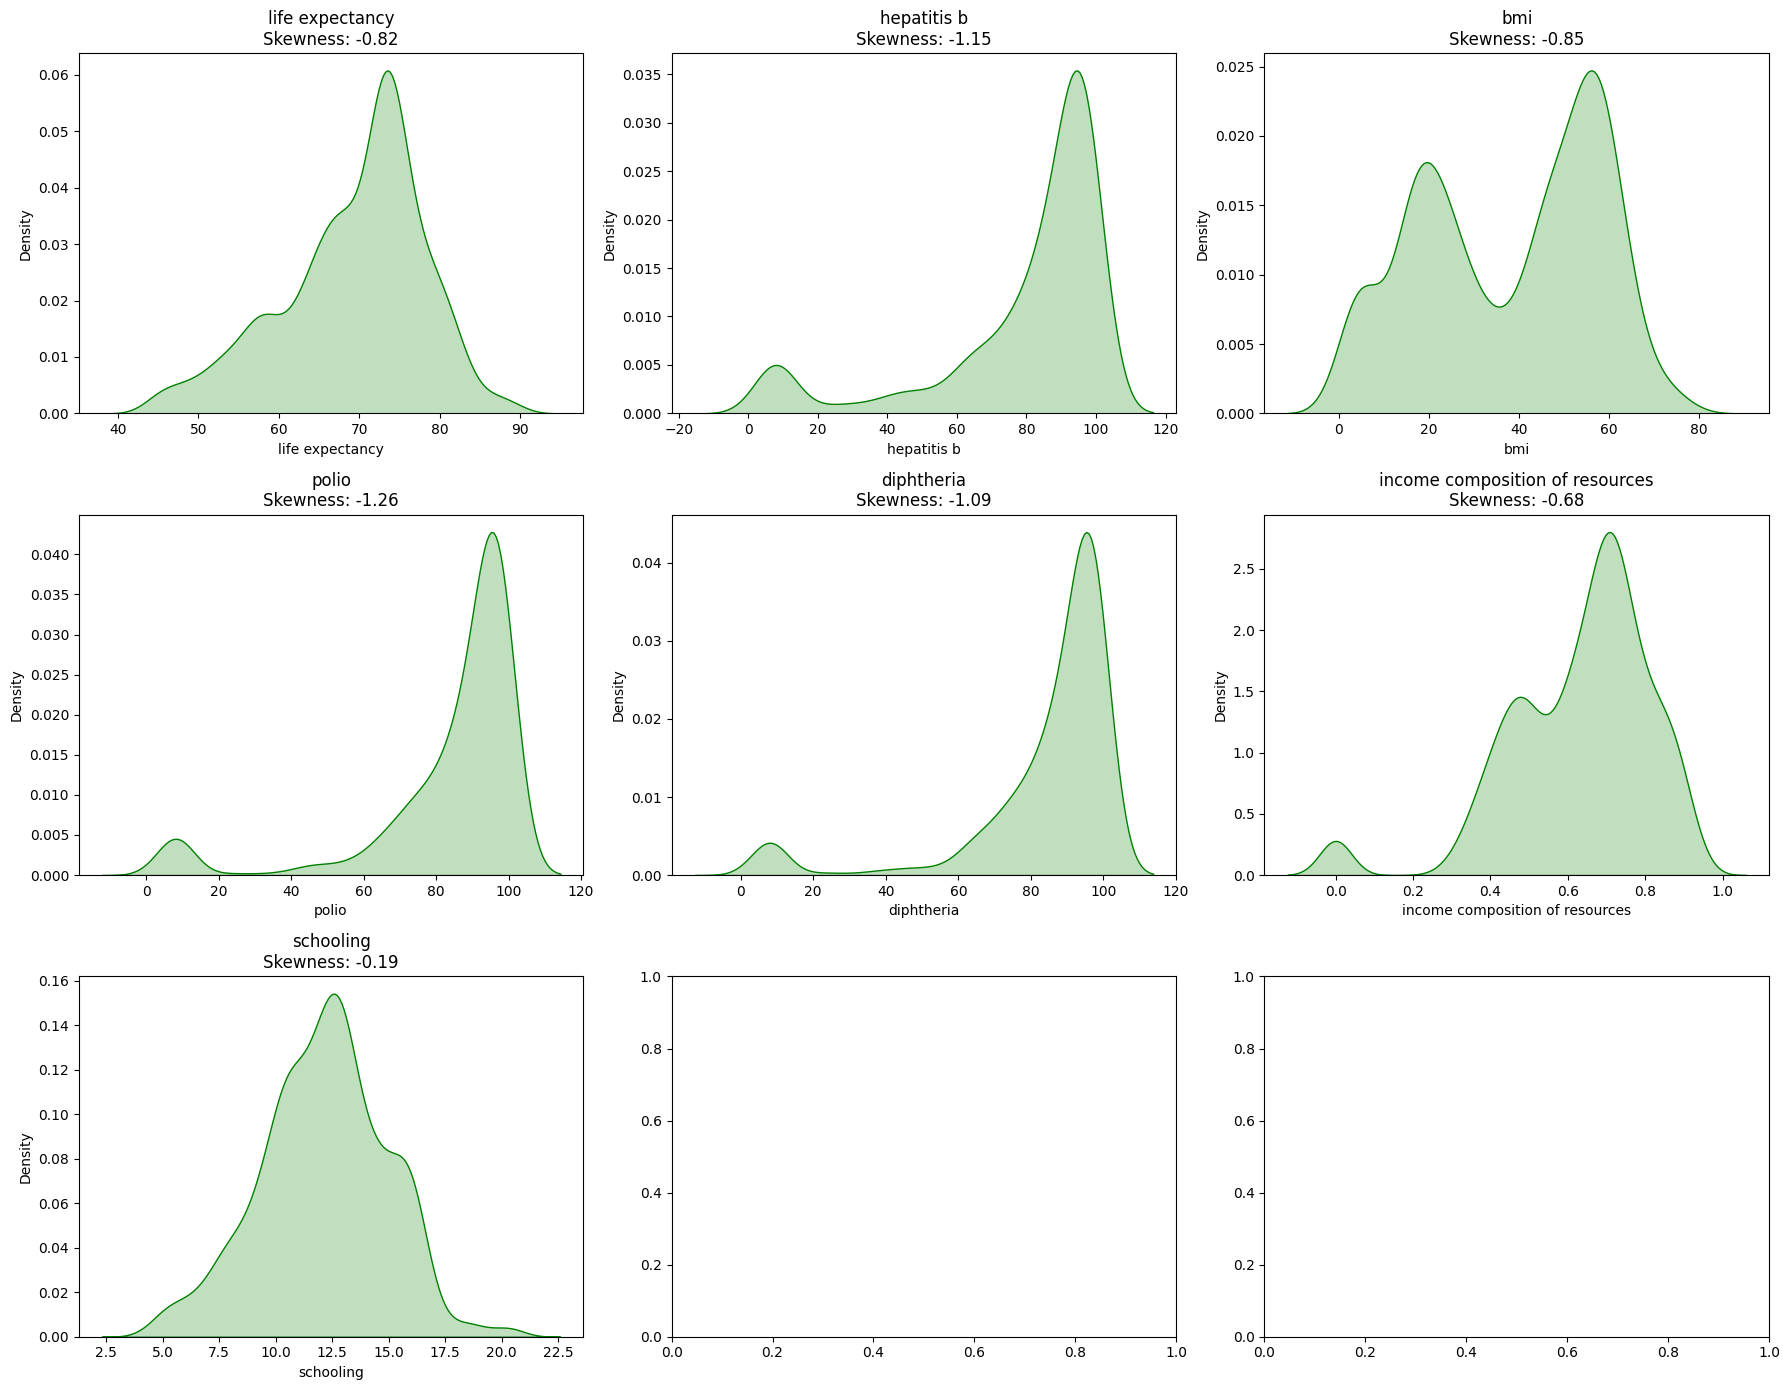

In [30]:
# Filter columns with negative skewness (left-skewed)
left_skewed = skewness_df[skewness_df["Skewness"] < 0]

# Get left-skewed column names
left_skewed_columns = left_skewed["Column"].tolist()

# Prepare data for plotting
left_skewed_data = life_expectancy_numeric[left_skewed_columns]

# Create subplots for left-skewed columns
num_skewed = len(left_skewed_columns)
fig, axes = plt.subplots(
    nrows=(num_skewed // 3 + (num_skewed % 3 > 0)),  # Number of rows
    ncols=3,  # Fixed number of columns per row
    figsize=(18, num_skewed * 2),
)
axes = axes.flatten()

# Plot area charts for each left-skewed column
for idx, column_name in enumerate(left_skewed_columns):
    values = left_skewed_data[column_name].dropna()  # Drop NaN for clean plotting
    sns.kdeplot(values, shade=True, color="green", ax=axes[idx])
    axes[idx].set_title(f"{column_name}\nSkewness: {left_skewed.loc[left_skewed['Column'] == column_name, 'Skewness'].values[0]:.2f}", fontsize=12)


plt.tight_layout()
plt.show()


# Kurtosis

---

Kurtosis is a statistical measure that describes the "tailedness" of the distribution of a dataset. It provides insights into the extremity of outliers and the sharpness or flatness of the distribution compared to a normal distribution.

- Kurtosis measures the height and sharpness of the central peak of a distribution and the weight of its tails.
- It helps evaluate the presence of extreme values (outliers) in the data.


# Types of Kurtosis:

## Mesokurtic:

- A distribution with kurtosis equal to that of a normal distribution.
- Tails are of moderate size.

--- 

## Leptokurtic:

- A distribution with positive excess kurtosis (heavy tails).
- More data is concentrated in the tails and near the mean.
- Indicates extreme outliers.

---

## Platykurtic:

- A distribution with negative excess kurtosis (light tails).
- Less data is in the tails, and the distribution is flatter.
- Indicates fewer extreme outliers.

---

## Excess Kurtosis:

Excess kurtosis is kurtosis relative to a normal distribution, which has a kurtosis of 3.
Formula:
        Excess Kurtosis = Kurtosis − 3

### Interpretation:

- Excess Kurtosis = 0: Mesokurtic (normal-like distribution).
- Excess Kurtosis > 0: Leptokurtic (heavy tails).
- Excess Kurtosis < 0: Platykurtic (light tails).

In [31]:
# Function to calculate kurtosis
def calculate_kurtosis(values):
    return kurtosis(values, fisher=True, nan_policy='omit')  # Fisher=True for excess kurtosis

In [32]:
kurtosis_results = []

In [33]:
# Loop through each column to calculate kurtosis
for column_name, column_values in life_expectancy_numeric.items():
    kurt = calculate_kurtosis(column_values)
    kurtosis_results.append({"Column": column_name, "Kurtosis": kurt})

In [34]:
kurtosis_df = pd.DataFrame(kurtosis_results)

In [35]:
# Define kurtosis classification function
def classify_kurtosis(kurtosis):
    if kurtosis > 0:
        return "Leptokurtic"
    elif kurtosis < 0:
        return "Platykurtic"
    else:
        return "Mesokurtic"

In [36]:
# Add kurtosis classification
kurtosis_df["Kurtosis Type"] = kurtosis_df["Kurtosis"].apply(classify_kurtosis)
kurtosis_df

,Column,Kurtosis,Kurtosis Type
0,life expectancy,0.037,Leptokurtic
1,adult mortality,2.390,Leptokurtic
2,infant deaths,85.058,Leptokurtic
3,alcohol,-0.593,Platykurtic
4,percentage expenditure,30.895,Leptokurtic
5,hepatitis b,2.221,Leptokurtic
6,measles,74.442,Leptokurtic
7,bmi,-1.270,Platykurtic
8,under-five deaths,81.935,Leptokurtic
9,polio,5.045,Leptokurtic


In [37]:
# Filter columns based on kurtosis type
leptokurtic = kurtosis_df[kurtosis_df["Kurtosis"] > 0]
platykurtic = kurtosis_df[kurtosis_df["Kurtosis"] < 0]

In [38]:
# Visualization for Leptokurtic Columns
leptokurtic_columns = leptokurtic["Column"].tolist()
leptokurtic_data = life_expectancy_numeric[leptokurtic_columns]

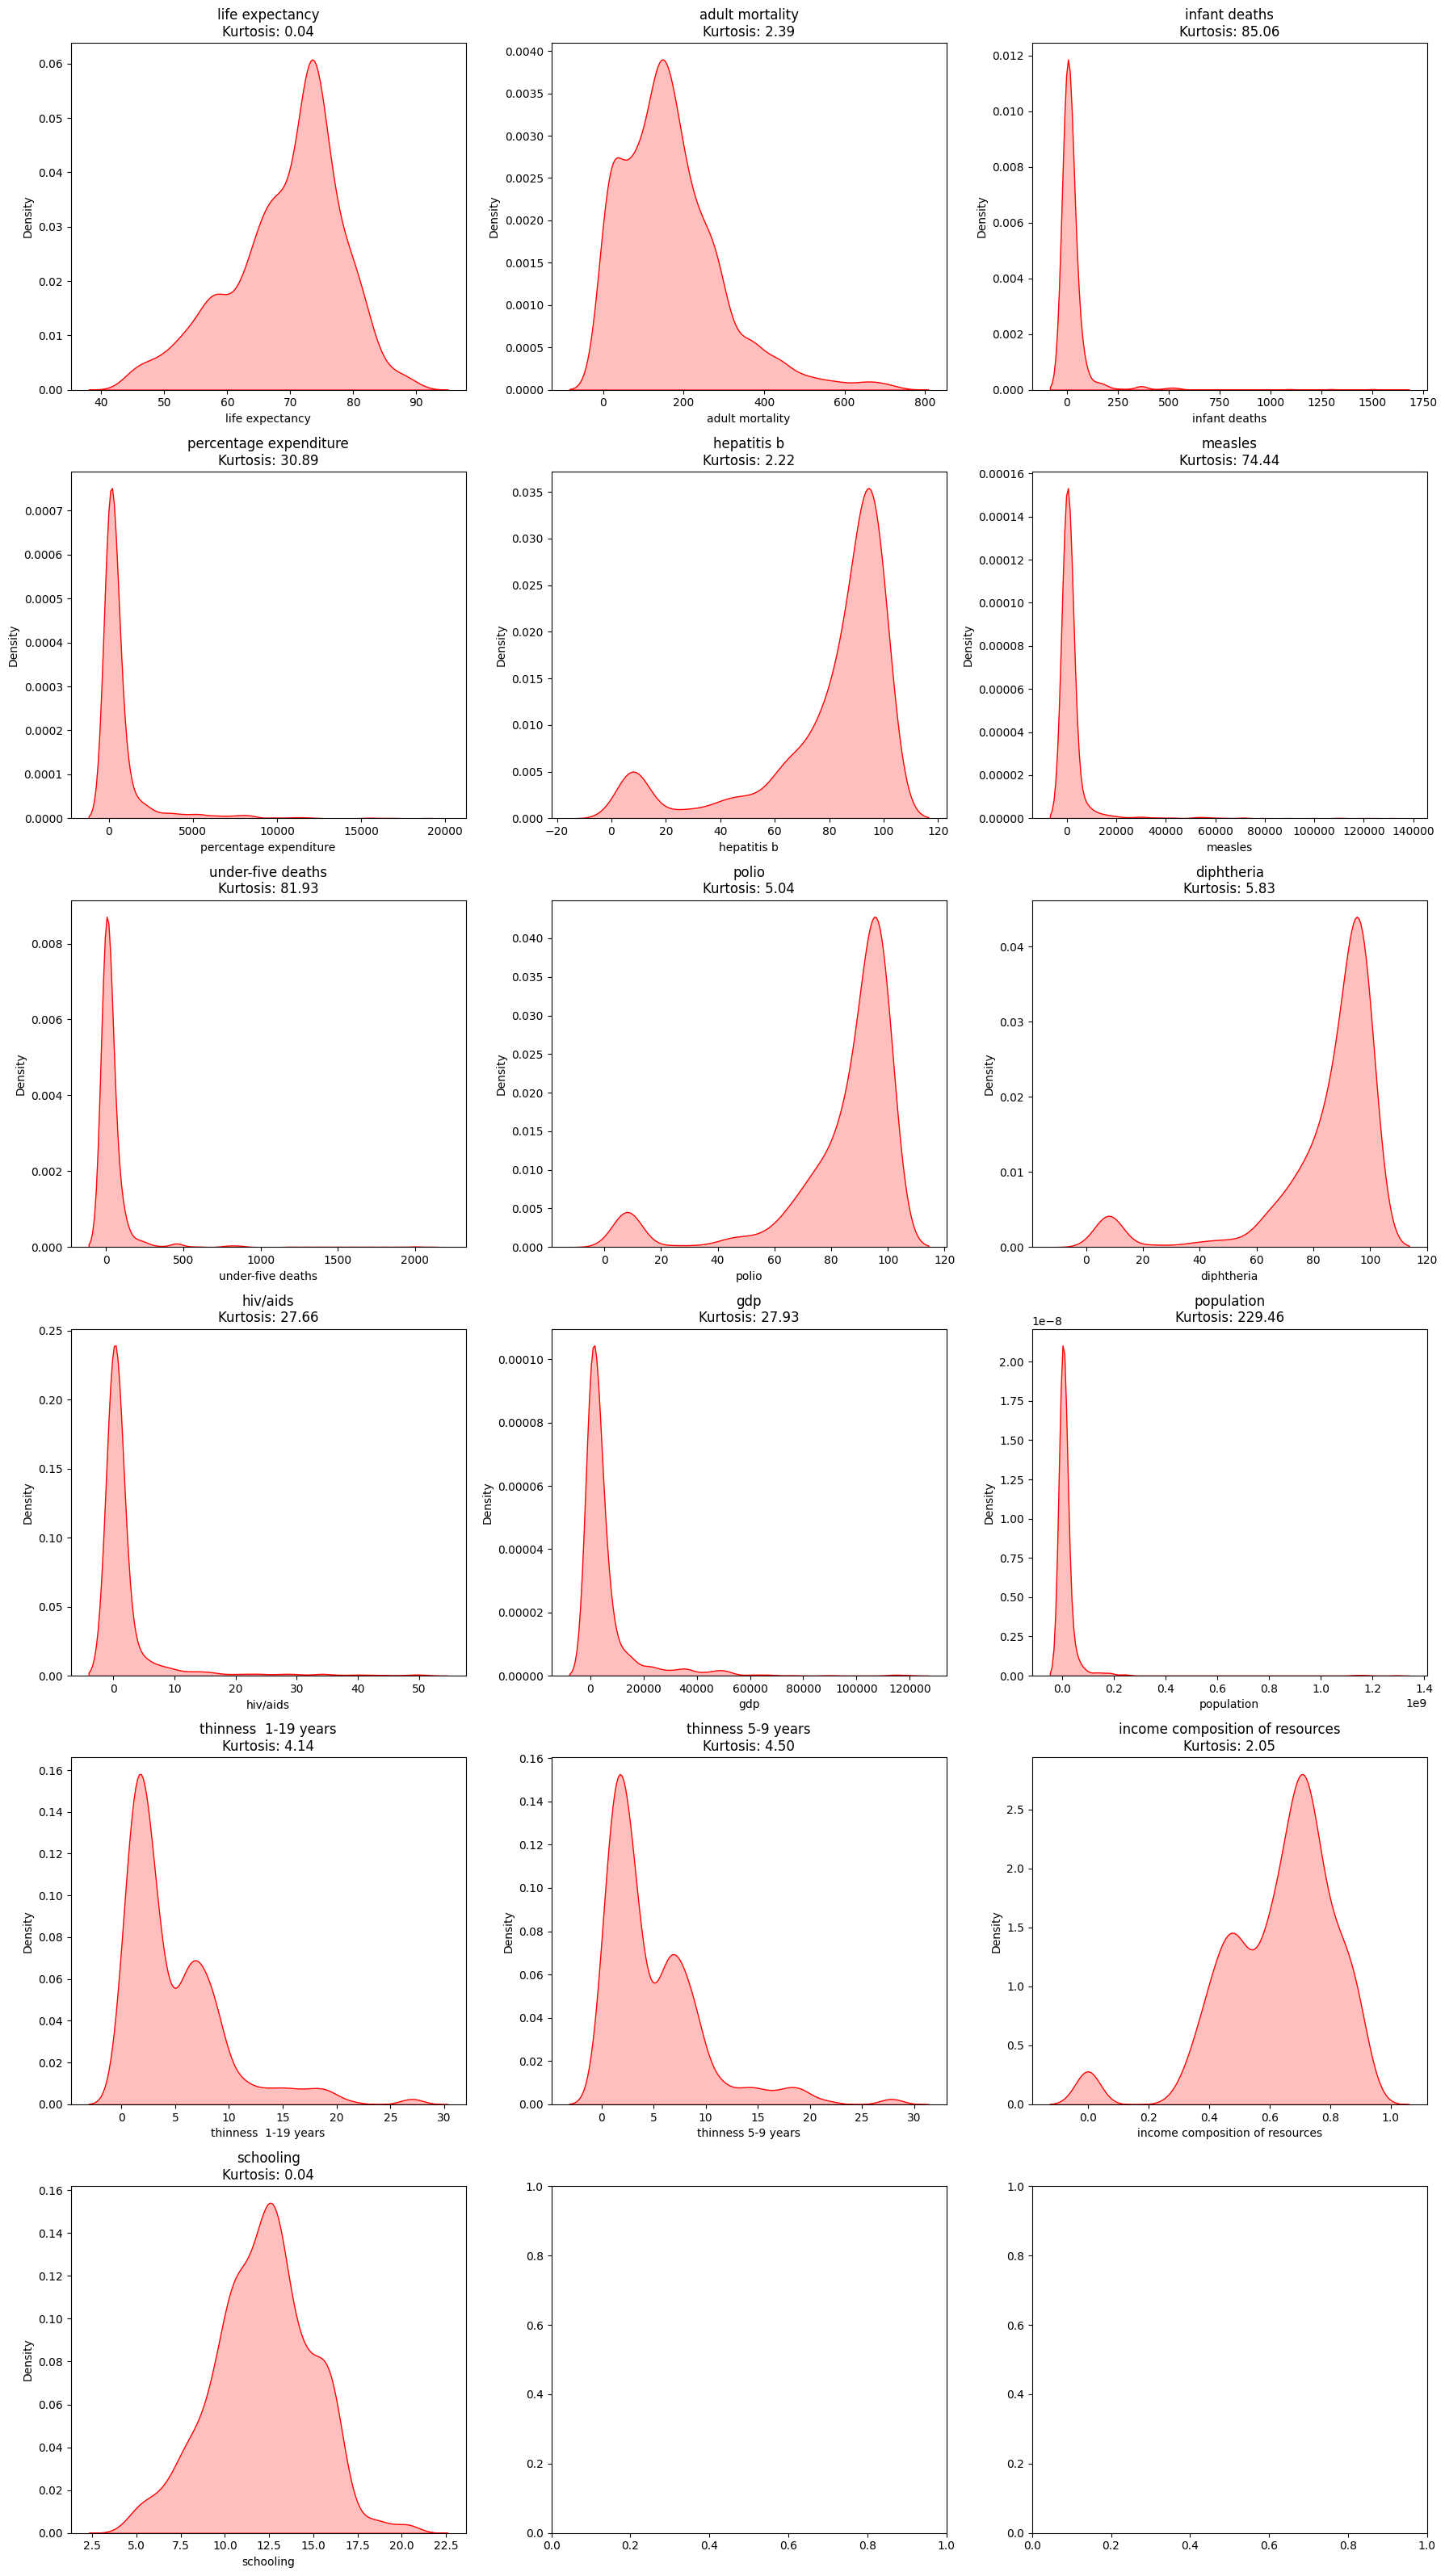

In [39]:
num_leptokurtic = len(leptokurtic_columns)
fig, axes = plt.subplots(
    nrows=(num_leptokurtic // 3 + (num_leptokurtic % 3 > 0)),
    ncols=3,
    figsize=(18, num_leptokurtic * 2),
)
axes = axes.flatten()
for idx, column_name in enumerate(leptokurtic_columns):
    values = leptokurtic_data[column_name].dropna()
    sns.kdeplot(values, shade=True, color="red", ax=axes[idx])
    axes[idx].set_title(f"{column_name}\nKurtosis: {leptokurtic.loc[leptokurtic['Column'] == column_name, 'Kurtosis'].values[0]:.2f}", fontsize=12)

plt.tight_layout()
plt.show()


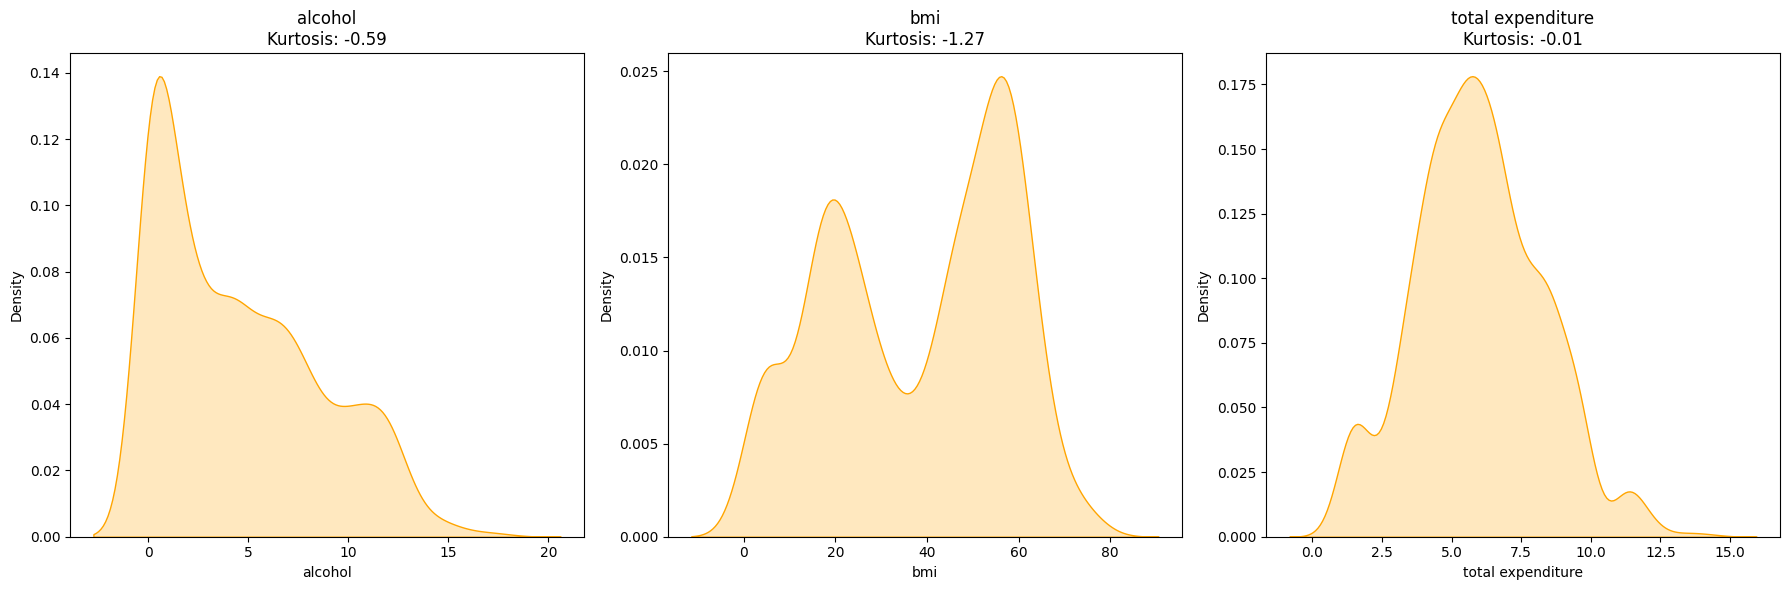

In [40]:
# Visualization for Platykurtic Columns
platykurtic_columns = platykurtic["Column"].tolist()
platykurtic_data = life_expectancy_numeric[platykurtic_columns]

num_platykurtic = len(platykurtic_columns)
fig, axes = plt.subplots(
    nrows=(num_platykurtic // 3 + (num_platykurtic % 3 > 0)),
    ncols=3,
    figsize=(18, num_platykurtic * 2),
)
axes = axes.flatten()

for idx, column_name in enumerate(platykurtic_columns):
    values = platykurtic_data[column_name].dropna()
    sns.kdeplot(values, shade=True, color="orange", ax=axes[idx])
    axes[idx].set_title(f"{column_name}\nKurtosis: {platykurtic.loc[platykurtic['Column'] == column_name, 'Kurtosis'].values[0]:.2f}", fontsize=12)

plt.tight_layout()
plt.show()

# Dispersion: Range, Variance, Standard Deviation, Interquartile Range, and Quartiles

Dispersion measures the spread or variability of a dataset. It provides insights into how much the data points deviate from the central value (mean, median, or mode). Here's a breakdown of key measures of dispersion:

# 1. Range

## Definition

The simplest measure of dispersion; the difference between the maximum and minimum values in the dataset.

## Formula:

Range = Maximum Value − Minimum Value

## Key Characteristics:

- Sensitive to outliers, as it depends only on the extreme values.
- Useful for a quick sense of the spread but lacks depth for complex data.

# 2. Variance

## Definition

Measures the average squared deviation of each data point from the mean. It quantifies the overall spread of the dataset.

## Key Characteristics:

Units are squared, making interpretation less intuitive.

# 3. Standard Deviation

## Definition

The square root of the variance, providing a measure of dispersion in the same units as the data.

## Key Characteristics:
Widely used because it is intuitive and in the same units as the data.
Sensitive to outliers.

In [41]:
# Function to calculate dispersion measures for a column
def calculate_dispersion(column):
    column_cleaned = column.dropna()  # Drop NaN values
    if column_cleaned.empty:
        return None  # Return None for empty columns
    
    data_range = np.max(column_cleaned) - np.min(column_cleaned)
    variance = np.var(column_cleaned, ddof=1)  # Sample variance
    std_dev = np.std(column_cleaned, ddof=1)  # Sample standard deviation
    q1 = np.percentile(column_cleaned, 25)
    q3 = np.percentile(column_cleaned, 75)
    iqr = q3 - q1
    
    return {
        "Range": data_range,
        "Variance": variance,
        "Standard Deviation": std_dev,
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr
    }

In [42]:
# Loop through each numeric column and calculate dispersion measures
dispersion_results = []
for column_name, column_values in life_expectancy_numeric.items():
    measures = calculate_dispersion(column_values)
    if measures:
        measures["Column"] = column_name
        dispersion_results.append(measures)

In [43]:
dispersion_df = pd.DataFrame(dispersion_results)

In [44]:
dispersion_df

,Range,Variance,Standard Deviation,Q1,Q3,IQR,Column
0,45.000,77.384,8.797,64.400,75.000,10.600,life expectancy
1,722.000,15702.701,125.310,77.000,227.000,150.000,adult mortality
2,1600.000,14604.043,120.847,1.000,22.000,21.000,infant deaths
3,17.860,16.234,4.029,0.810,7.340,6.530,alcohol
4,18961.349,3094887.858,1759.229,37.439,509.390,471.951,percentage expenditure
5,97.000,655.599,25.605,74.000,96.000,22.000,hepatitis b
6,131441.000,101723402.361,10085.802,0.000,373.000,373.000,measles
7,75.100,390.230,19.754,19.500,55.800,36.300,bmi
8,2100.000,26535.758,162.898,1.000,29.000,28.000,under-five deaths
9,96.000,504.028,22.451,81.000,97.000,16.000,polio


# Combined View

In [45]:
combined_df = pd.merge(mean_df, median_df, on="Column", how="outer")
combined_df = pd.merge(combined_df, mode_df, on="Column", how="outer")
combined_df = pd.merge(combined_df, dispersion_df, on="Column", how="outer")
combined_df = pd.merge(combined_df, skewness_df, on="Column", how="outer")
combined_df = pd.merge(combined_df, kurtosis_df, on="Column", how="outer")

combined_df

,Column,Mean,Median,Mode,Range,Variance,Standard Deviation,Q1,Q3,IQR,Skewness,Skewness Type,Kurtosis,Kurtosis Type
0,adult mortality,168.215,148.000,"14.0, 12.0",722.000,15702.701,125.310,77.000,227.000,150.000,0.484,Right,2.390,Leptokurtic
1,alcohol,4.533,3.785,0.01,17.860,16.234,4.029,0.810,7.340,6.530,0.553,Right,-0.593,Platykurtic
2,bmi,38.129,43.650,"57.2, 55.7, 58.5, 57.0",75.100,390.230,19.754,19.500,55.800,36.300,-0.846,Left,-1.270,Platykurtic
3,diphtheria,84.155,92.000,99.0,97.000,465.662,21.579,82.000,97.000,15.000,-1.091,Left,5.834,Leptokurtic
4,gdp,5566.032,1591.200,"584.25921, 612.696514, 631.744976, 669.959, 63...",119171.060,131696283.502,11475.900,462.150,4718.513,4256.363,1.039,Right,27.927,Leptokurtic
5,hepatitis b,79.218,89.000,98.0,97.000,655.599,25.605,74.000,96.000,22.000,-1.146,Left,2.221,Leptokurtic
6,hiv/aids,1.984,0.100,0.1,50.500,36.389,6.032,0.100,0.700,0.600,0.937,Right,27.664,Leptokurtic
7,income composition of resources,0.632,0.673,0.0,0.936,0.034,0.183,0.509,0.751,0.242,-0.679,Left,2.051,Leptokurtic
8,infant deaths,32.553,3.000,0,1600.000,14604.043,120.847,1.000,22.000,21.000,0.734,Right,85.058,Leptokurtic
9,life expectancy,69.302,71.700,73.0,45.000,77.384,8.797,64.400,75.000,10.600,-0.818,Left,0.037,Leptokurtic
